In [1]:
import pandas as pd
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name, size = 20)
%matplotlib inline

In [2]:
df = pd.read_csv('c:/data/dacon/card.csv')

In [3]:
sj = df[df['selng_cascnt']=='석재'].index
ct = df[df['selng_cascnt']=='커텐'].index
ys = df[df['selng_cascnt']=='영상물'].index
bj = df[df['selng_cascnt']=='복지매장'].index
ch = df[df['selng_cascnt']=='축협직영매장'].index

df_mod1 = df.drop(sj)
df_mod2 = df_mod1.drop(ct)
df_mod3 = df_mod2.drop(ys)
df_mod4 = df_mod3.drop(bj)
df_mod5 = df_mod4.drop(ch)

In [4]:
df_mod5['selng_cascnt_int'] = pd.to_numeric(df_mod5['selng_cascnt'])
df_mod5['salamt_int'] = pd.to_numeric(df_mod5['salamt'])
df_mod5['receipt_dttm'] = df_mod5['receipt_dttm'].astype(str)
df_mod5['date']=df_mod5['receipt_dttm'].str[0:4]+"-"+df_mod5["receipt_dttm"].str[4:6]+"-"+df_mod5["receipt_dttm"].str[6:8]
df_mod5['date']=df_mod5['date'].astype('datetime64[ns]')

In [7]:
def forcast_value(df,column):
    global fc
    model=auto_arima(df[column],suppress_warnings=True)
    p,d,q = model.order
    if model.order == (0,0,0):
        p = 1
    elif p*q != 0:        
        q = 0
    else:
        pass
    n=int(df.shape[0]*0.8)
    train=df[:n]
    test=df[n:]
    model=ARIMA(train[column], order=(p,d,q)).fit()

    fc,se,conf=model.forecast(steps=len(test))
    fc_series=pd.Series(fc, index=test.index)    

    lower=pd.Series(conf[:,0], index=test.index) #하한값
    upper=pd.Series(conf[:,1], index=test.index) #상한값
    plt.figure(figsize=(12,5),dpi=100)
    plt.plot(df[column], label='Actuals') #실제값
    plt.plot(fc_series, label='Forecast') #예측값
    # 예측값의 구간
    plt.fill_between(lower.index, lower, upper, alpha=0.15)
    plt.legend(loc='upper left', fontsize=8)
    plt.show()
#     print(fc)
#     print(type(fc))
#     print(fc_series)
#     print(fc_series.diff(periods=1))
    fc_list = list(fc)
    fc_value = 0
    for i in range(-10,0,1):
        fc_value += (fc_list[i]-fc_list[i-1])/abs(fc_list[i-1])*100
    print(fc_value)

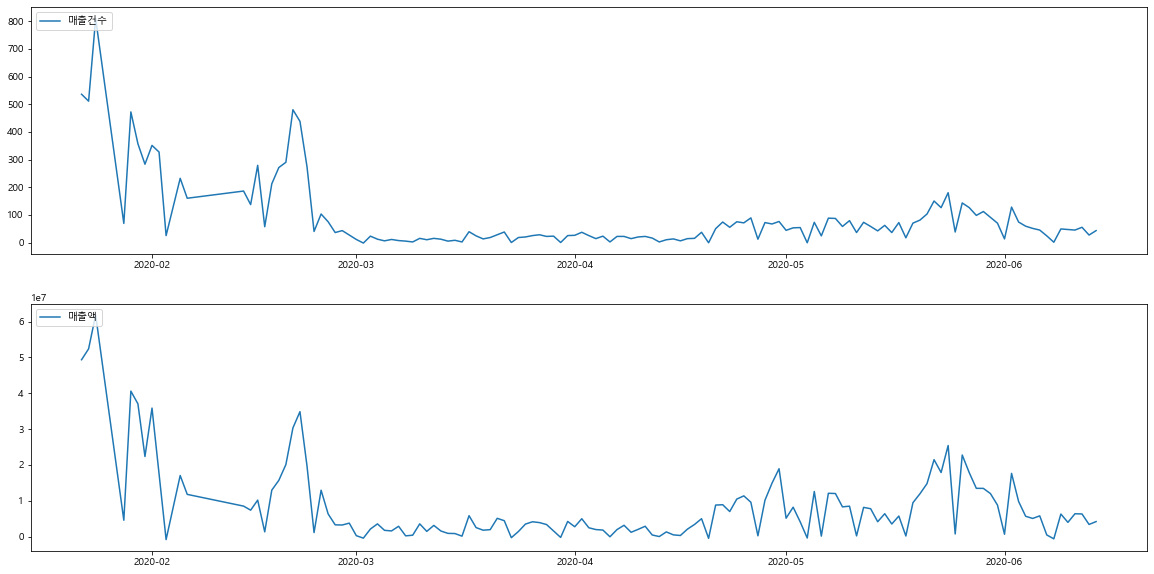

In [37]:
#매출건수 매출액 비교
fig, ax = plt.subplots(2,1, figsize=(20,10))

num = df_mod5[df_mod5['mrhst_induty_cl_nm']=='수 영 장'].mrhst_induty_cl_code.iloc[0]

ax[0].plot(df_mod5[df_mod5['mrhst_induty_cl_code']== num].groupby('date').selng_cascnt_int.sum(), label='매출건수')
ax[0].legend(loc = 'upper left')

ax[1].plot(df_mod5[df_mod5['mrhst_induty_cl_code']== num].groupby('date').salamt_int.sum(), label='매출액')
ax[1].legend(loc = 'upper left')
plt.show()

C:\Users\analysis\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\analysis\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\analysis\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\analysis\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


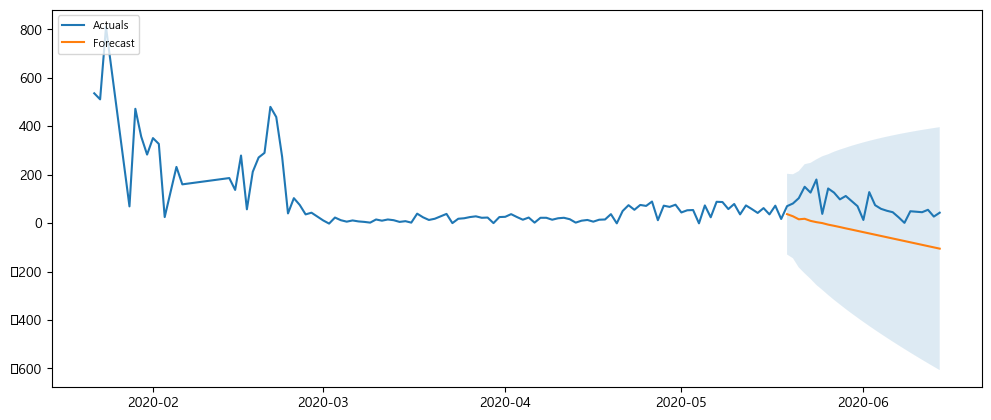

-71.20609577651109


In [38]:
# 매출건수 ARIMA
df = pd.DataFrame(df_mod5[df_mod5['mrhst_induty_cl_code'] == num].groupby('date').selng_cascnt_int.sum())
forcast_value(df,'selng_cascnt_int')

C:\Users\analysis\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\analysis\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\analysis\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\analysis\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


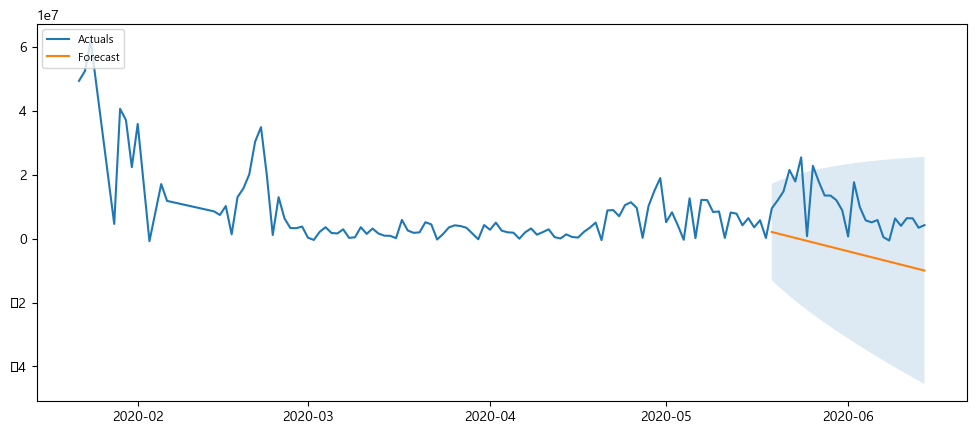

-64.48822514398192


In [39]:
# 매출액 ARIMA
df = pd.DataFrame(df_mod5[df_mod5['mrhst_induty_cl_code'] == num].groupby('date').salamt_int.sum())
forcast_value(df,'salamt_int')